In [558]:
with open('libraries.py') as f:
    code = f.read()
exec(code)

with open('functions.py') as f:
    code = f.read()
exec(code)

In [559]:
pd.reset_option('all')
pd.set_option('display.max_rows', 100)

In [560]:
# determine user
user = getpass.getuser()
if user == 'peymanshahidi':
    main_folder_path = '/Users/peymanshahidi/Dropbox (MIT)/Research/AI and Occupations/ai-exposure'
    data_path = f'{main_folder_path}/output'

In [561]:
onet_data_path = f'{data_path}/data/onet_occupations_yearly.csv'

# list of occupations to create DAGs for
occupation_list = ['travelAgents', 'insuranceUnderwriters', 'pileDriverOperators', 
                   'dredgeOperators', 'gradersAndSortersForAgriculturalProducts', 'reinforcingIronAndRebarWorkers',
                   'insuranceAppraisersForAutoDamage', 'floorSandersAndFinishers', 'dataEntryKeyer', 
                   'athletesAndSportsCompetitors', 'audiovisualEquipmentInstallerAndRepairers', 'hearingAidSpecialists', 
                   'personalCareAides', 'proofreadersAndCopyMarkers', 'chiropractors', 
                   'shippingReceivingAndInventoryClerks', 'cooksShortOrder', 'orthodontists',
                   'subwayAndStreetcarOperators', 'packersAndPackagersHand', 'hoistAndWinchOperators', 
                   'forgingMachineSettersOperatorsAndTenders', 'avionicsTechnicians', 'dishwashers', 
                   'dispatchersExceptPoliceFireAndAmbulance', 'familyMedicinePhysicians', 'MachineFeedersAndOffbearers'
                   ]

occupation = 'travelAgents'
# occupation = 'insuranceAppraisersForAutoDamage'
# occupation = 'insuranceUnderwriters'
#occupation = 'pileDriverOperators'
#occupation = 'floorSandersAndFinishers'
# occupation = 'dataEntryKeyer' 

# Generate occupation-specific strings
GPT_input_occupation, plot_title_occupation, occupation_code, occupation_folder = pick_occupation(occupation)

In [562]:
# set alpha as AI quality metric
epsilon = 1e-8
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1-epsilon]
alpha_list = [epsilon*5e4, epsilon*1e5, epsilon*5e5, epsilon*1e6, epsilon*5e6, 0.1, 0.2, 0.3, 0.4, 0.5]
alpha_list = [epsilon*5e4, epsilon*1e5, epsilon*5e5, epsilon*1e6, epsilon*5e6, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1-epsilon]

### Initialize input-output paths

In [563]:
# Manual DAG
input_path = f'{occupation_folder}/{occupation}_M_DAG_df.csv'
output_path = f'{occupation_folder}/{occupation}_costMin_M.csv'

# First Last Task DAG
input_path = f'{occupation_folder}/{occupation}_FLT_GPT_DAG_df.csv'
output_path = f'{occupation_folder}/{occupation}_costMin_FLT.csv'

# Conditioned First Last Task DAG
input_path = f'{occupation_folder}/{occupation}_CFLT_GPT_DAG_df.csv'
output_path = f'{occupation_folder}/{occupation}_costMin_CFLT.csv'

# # Partitioned DAG
# input_path = f'{occupation_folder}/{occupation}_P_GPT_DAG_df.csv'
# output_path = f'{occupation_folder}/{occupation}_costMin_P.csv'

# # Conditioned Partitioned DAG
# input_path = f'{occupation_folder}/{occupation}_CP_GPT_DAG_df.csv'
# output_path = f'{occupation_folder}/{occupation}_costMin_CP.csv'

In [564]:
# read DAG
dag_df = pd.read_csv(input_path)

# remove edges if comment column labeled with "TriangleRemovedFlag" (edge is there for plotting purposes and is not part of the actual DAG)
if 'comment' in dag_df.columns:
    dag_df = dag_df[~dag_df['comment'].str.endswith('TriangleRemovedFlag')]

# get task stats
tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats.csv')

tasks_stats = tasks_stats[['task', 'human_cost', 'management_cost', 'management_difficulty']]
tasks_stats.rename(columns={'management_difficulty': 'difficulty'}, inplace=True)

# tasks_stats = tasks_stats[['task', 'human_cost', 'machine_cost', 'completion_difficulty']]
# tasks_stats.rename(columns={'machine_cost': 'management_cost', 'completion_difficulty': 'difficulty'}, inplace=True)

#tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats_oldold.csv')

# print stats
#tasks_stats.iloc[:,1:].sum()
dag_df

,source,target,comment
0,Converse with customer to determine destinatio...,Collect payment for transportation and accommo...,The worker collecting payment needs to know th...
1,"Compute cost of travel and accommodations, usi...",Collect payment for transportation and accommo...,The worker collecting payment needs to know th...
2,"Book transportation and hotel reservations, us...",Collect payment for transportation and accommo...,The worker collecting payment needs to know th...
4,Provide customer with brochures and publicatio...,Collect payment for transportation and accommo...,The worker collecting payment needs to know th...
5,Collect payment for transportation and accommo...,Print or request transportation carrier ticket...,The worker printing or requesting transportati...
6,Collect payment for transportation and accommo...,"Record and maintain information on clients, ve...",The worker recording and maintaining informati...
7,Converse with customer to determine destinatio...,"Compute cost of travel and accommodations, usi...",The worker computing the cost of travel and ac...
8,Converse with customer to determine destinatio...,"Book transportation and hotel reservations, us...",The worker booking transportation and hotel re...
9,Converse with customer to determine destinatio...,"Plan, describe, arrange, and sell itinerary to...","The worker planning, describing, arranging, an..."
10,Converse with customer to determine destinatio...,Provide customer with brochures and publicatio...,The worker providing brochures and travel info...


In [565]:
# extract list of tasks and create a dictionary for indexing tasks
tasks_list = tasks_stats['task'].unique()
tasks_dict = {i: node for i, node in enumerate(tasks_list, start=0)}

# create numpy array of adjacency matrix
adjacency_matrix = np.zeros((len(tasks_list), len(tasks_list)), dtype=int)
aux_dict = {value: key for key, value in tasks_dict.items()}
for _, row in dag_df.iterrows():
    source_index = aux_dict[row['source']]
    target_index = aux_dict[row['target']]
    adjacency_matrix[source_index, target_index] = 1

tasks_dict

{0: 'Collect payment for transportation and accommodations from customer.',
 1: 'Converse with customer to determine destination, mode of transportation, travel dates, financial considerations, and accommodations required.',
 2: 'Compute cost of travel and accommodations, using calculator, computer, carrier tariff books, and hotel rate books, or quote package tours costs.',
 3: 'Book transportation and hotel reservations, using computer or telephone.',
 4: 'Plan, describe, arrange, and sell itinerary tour packages and promotional travel incentives offered by various travel carriers.',
 5: 'Provide customer with brochures and publications containing travel information, such as local customs, points of interest, or foreign country regulations.',
 6: 'Print or request transportation carrier tickets, using computer printer system or system link to travel carrier.',
 7: 'Record and maintain information on clients, vendors, and travel packages.',
 8: '"Target"'}

In [566]:
# add task_dict key and reset index
aux_dict = {value: key for key, value in tasks_dict.items()}
tasks_stats['dict_index'] = tasks_stats.apply(lambda row: aux_dict[row.task], axis=1)
tasks_stats = tasks_stats.sort_values(by='dict_index')
tasks_stats = tasks_stats.set_index('dict_index', drop=False)
tasks_stats.index.name = None

In [567]:
# create dictionaries for human cost, management cost, and difficulty
M_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['human_cost']))
A_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_cost']))
D_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['difficulty']))

### Generate all possible partition schemes for the set of tasks (ignoring structre of the DAG)

In [568]:
from itertools import combinations

def partitions(set_):
    if not set_:
        yield []
        return
    for i in range(1, len(set_) + 1):
        for part in combinations(set_, i):
            remaining = set(set_) - set(part)
            if not remaining:
                yield [list(part)]
            else:
                for b in partitions(list(remaining)):
                    yield [list(part)] + b

def generate_unique_partitions(numbers):
    all_partitions = set()
    for partition in partitions(numbers):
        # Create a frozenset of frozensets to make each partition hashable and order-independent
        partition_set = frozenset(frozenset(part) for part in partition)
        all_partitions.add(partition_set)
    
    # Convert the frozensets back to lists for the final output
    unique_partitions = [list(map(list, partition)) for partition in all_partitions]

    # Sort elements
    unique_partitions = sorted([sorted(x) for x in unique_partitions], key=len)
    return unique_partitions

In [569]:
# Generate list of numbers for non-"Target" tasks in occupation
tasks_list_numbers = list(range(len(tasks_list)-1)) # -1 for "Target" task: don't want to include it in task partitions as it's its own separate partition

# Generate all possible partitioning schemes
all_partitions = generate_unique_partitions(tasks_list_numbers)


### Check if partition scheme is "valid" (i.e., if its non-singleton partitions are a connected graph)

In [570]:
def is_connected(matrix):
    # Number of nodes in the matrix
    num_nodes = matrix.shape[0]
    
    # Visited array to keep track of visited nodes
    visited = np.zeros(num_nodes, dtype=bool)
    
    # Helper function to perform DFS
    def dfs(node):
        visited[node] = True
        # Visit all the neighbors of the current node
        for neighbor in range(num_nodes):
            if matrix[node, neighbor] == 1 and not visited[neighbor]:
                dfs(neighbor)
            elif matrix[neighbor, node] == 1 and not visited[neighbor]:
                dfs(neighbor)
    
    # Start DFS from the first node (node 0)
    dfs(0)
    
    # If all nodes are visited, the matrix is connected
    return np.all(visited)


def validate_partition_using_connectedness(adjacency_matrix, tasks_list):
    # Return valid if Singleton
    if len(tasks_list) == 1:
        return True
    # Check if partition forms connected graph
    else:
        # Subset original adjacency matrix
        subset_matrix = adjacency_matrix[np.ix_(tasks_list, tasks_list)]

        # check if subset matrix is a connected graph
        subset_matrix_connected = is_connected(subset_matrix)

        # return true if connected and false otherwise
        return subset_matrix_connected

In [571]:
# Get valid partitioning schemes from all possible partitions to cut computation load
valid_partitions = []
for scheme in all_partitions:
    # Set valid partitions count to 0
    valid_partition_count = 0
    for partition in scheme:
        valid_partition = validate_partition_using_connectedness(adjacency_matrix, partition)
        if valid_partition:
            valid_partition_count += 1
    
    # If number of valid partitions within a partition scheme is equal to 
    # number of partitions in partition scheme then partition scheme is valid
    if valid_partition_count == len(scheme):
        valid_partitions.append(scheme)

# Print stats
print(f'Number of all possible partitioning schemes: {len(all_partitions)}')
print(f'Number of valid partitioning schemes given DAG structure: {len(valid_partitions)}')

# print some partitions
print('\nExample partitions:')
for partition in valid_partitions[10:20]:
    print(partition)

Number of all possible partitioning schemes: 4140
Number of valid partitioning schemes given DAG structure: 1432

Example partitions:
[[0, 1, 2, 3, 4, 6, 7], [5]]
[[0, 2, 4], [1, 3, 5, 6, 7]]
[[0, 3, 5, 6], [1, 2, 4, 7]]
[[0, 2, 3, 7], [1, 4, 5, 6]]
[[0, 1, 5, 6], [2, 3, 4, 7]]
[[0, 2, 4, 5, 7], [1, 3, 6]]
[[0, 1, 5, 6, 7], [2, 3, 4]]
[[0, 1, 3, 5, 6], [2, 4, 7]]
[[0, 1, 2, 3, 4, 5, 6], [7]]
[[0, 2, 3, 4, 7], [1, 5, 6]]


In [572]:
# get how many "singleton" partitions there are in valid partition
valid_execution_plans = pd.DataFrame()
for my_valid_partition in valid_partitions:
    singleton_partitions = [lst[0] for lst in my_valid_partition if len(lst) == 1]
    #singleton_partitions = [lst for lst in my_valid_partition if len(lst) == 1]

    # get the power set of "singleton" partitions
    # goal is to generate ways singleton tasks can be done by human or AI
    all_combinations = [[]]
    for r in range(1, len(singleton_partitions) + 1):
        combinations_r = itertools.combinations(singleton_partitions, r)
        all_combinations.extend(combinations_r)

    # Convert the combinations to a list of lists (optional)
    all_combinations = [list(comb) for comb in all_combinations]
    all_combinations

    # repeat my_valid_partition for each combination in all_combinations to create a dataframe later
    my_valid_partition_repeated = [my_valid_partition for _ in range(len(all_combinations))]
    aux_df = pd.DataFrame({'execution_plan': my_valid_partition_repeated, 
                        'human_tasks': all_combinations})
    
    # append to valid_execution_plans
    valid_execution_plans = pd.concat([valid_execution_plans, aux_df], ignore_index=True)

valid_execution_plans

,execution_plan,human_tasks
0,"[[0, 1, 2, 3, 4, 5, 6, 7]]",[]
1,"[[0, 2, 3, 4, 5], [1, 6, 7]]",[]
2,"[[0, 3, 5], [1, 2, 4, 6, 7]]",[]
3,"[[0, 2, 3, 4, 5, 6], [1, 7]]",[]
4,"[[0, 3, 4, 6], [1, 2, 5, 7]]",[]
...,...,...
9339,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 2, 4, 5, 6, 7]"
9340,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 3, 4, 5, 6, 7]"
9341,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 2, 3, 4, 5, 6, 7]"
9342,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[1, 2, 3, 4, 5, 6, 7]"


In [573]:
def get_partition_boundary(adjacency_matrix, partition):
    # create a matrix whose columns are nodes not in the partition and whose rows are nodes in the partition
    # (subset adjacency matrix to outgoing edges of partition nodes --i.e., rows-- and incoming edges of non-partition nodes --i.e., columns.)
    reduced_matrix = np.delete(adjacency_matrix, partition, axis=1) 
    reduced_matrix = reduced_matrix[partition, :]

    # find nodes in partition w/ an edge to non-partition nodes
    partition_boundary_tasks = [i for i in partition if np.any(reduced_matrix[partition.index(i), :])]

    return partition_boundary_tasks


def compute_plan_cost(adjacency_matrix, M_dict, A_dict, D_dict, AI_quality, execution_plan, human_tasks):
    # initialize costs
    total_cost = 0
    labor_cost = 0
    management_cost = 0

    for partition in execution_plan:
        if len(partition) == 1:
            if partition[0] in human_tasks:
                partition_cost = sum(M_dict[key] for key in partition)
                labor_cost += partition_cost
            else:
                AI_cost = sum(A_dict[key] for key in partition)
                difficulty = sum(D_dict[key] for key in partition)
                partition_cost = AI_cost * (AI_quality ** (-1 * difficulty))
                management_cost += partition_cost
        else:
            # calculate automated-chain management cost
            partition_boundary_tasks = get_partition_boundary(adjacency_matrix, partition)
            AI_cost = sum(A_dict[key] for key in partition_boundary_tasks)
            difficulty = sum(D_dict[key] for key in partition)
            partition_cost = AI_cost * (AI_quality ** (-1 * difficulty))
            management_cost += partition_cost
        
        total_cost += partition_cost

    return total_cost, labor_cost, management_cost

### Example

In [574]:
# get task stats
tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats.csv')
tasks_stats['machine_cost'] = 1# tasks_stats['machine_cost'] / 300
tasks_stats

,task,human_cost,management_cost,management_difficulty,machine_cost,completion_difficulty
0,Collect payment for transportation and accommo...,15,5,0.25,1,0.30
1,Converse with customer to determine destinatio...,30,10,0.75,1,0.65
2,"Compute cost of travel and accommodations, usi...",45,10,0.65,1,0.30
3,"Book transportation and hotel reservations, us...",30,30,0.35,1,0.35
4,"Plan, describe, arrange, and sell itinerary to...",120,30,0.75,1,0.75
5,Provide customer with brochures and publicatio...,30,10,0.35,1,0.25
6,Print or request transportation carrier ticket...,10,5,0.25,1,0.25
7,"Record and maintain information on clients, ve...",30,5,0.35,1,0.35
8,"""Target""",0,0,0.00,1,0.00


In [575]:
# add task_dict key and reset index
aux_dict = {value: key for key, value in tasks_dict.items()}
tasks_stats['dict_index'] = tasks_stats.apply(lambda row: aux_dict[row.task], axis=1)
tasks_stats = tasks_stats.sort_values(by='dict_index')
tasks_stats = tasks_stats.set_index('dict_index', drop=False)
tasks_stats.index.name = None

In [576]:
# create dictionaries for human cost, management cost, and difficulty
human_labor_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['human_cost']))
machine_labor_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['machine_cost']))
machine_management_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_cost']))

management_difficulty_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_difficulty']))
completion_difficulty_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['completion_difficulty']))

In [577]:
def get_partition_boundary(adjacency_matrix, partition):
    # create a matrix whose columns are nodes not in the partition and whose rows are nodes in the partition
    # (subset adjacency matrix to outgoing edges of partition nodes --i.e., rows-- and incoming edges of non-partition nodes --i.e., columns.)
    reduced_matrix = np.delete(adjacency_matrix, partition, axis=1) 
    reduced_matrix = reduced_matrix[partition, :]

    # find nodes in partition w/ an edge to non-partition nodes
    partition_boundary_tasks = [i for i in partition if np.any(reduced_matrix[partition.index(i), :])]

    return partition_boundary_tasks


def compute_plan_cost(adjacency_matrix, 
                      human_labor_dict, machine_labor_dict, 
                      machine_management_dict, 
                      management_difficulty_dict, 
                      AI_quality, execution_plan, human_tasks):
    # initialize costs
    human_labor_cost = 0
    machine_cost = 0
    management_cost = 0

    managed_tasks_list = []
    automated_tasks_list = []
    for partition in execution_plan:
        if len(partition) == 1:
            if partition[0] in human_tasks:
                labor_cost = sum(human_labor_dict[key] for key in partition)
                human_labor_cost += labor_cost
            else:
                managed_tasks_list.append(partition[0])
                machine_management_cost = sum(machine_management_dict[key] for key in partition)
                management_difficulty = sum(management_difficulty_dict[key] for key in partition)
                management_cost += machine_management_cost * (AI_quality ** (-1 * management_difficulty))
        else:
            # determine which tasks are automated and which tasks are managed
            managed_tasks = get_partition_boundary(adjacency_matrix, partition)
            automated_tasks = [task for task in partition if task not in managed_tasks]
            managed_tasks_list.append(managed_tasks)
            automated_tasks_list.append(automated_tasks)

            # calculate management cost of partition
            machine_management_cost = sum(machine_management_dict[key] for key in managed_tasks)
            management_difficulty = sum(management_difficulty_dict[key] for key in managed_tasks)
            management_cost += machine_management_cost * (AI_quality ** (-1 * management_difficulty))

            # calculate labor cost of partition
            machine_automation_cost = sum(machine_labor_dict[key] for key in automated_tasks)
            completion_difficulty = sum(completion_difficulty_dict[key] for key in automated_tasks)
            machine_cost += machine_automation_cost * (AI_quality ** (-1 * completion_difficulty))

    # rounding
    human_labor_cost = np.round(human_labor_cost, 4)
    machine_cost = np.round(machine_cost, 4)
    management_cost = np.round(management_cost, 4)

    return human_labor_cost, machine_cost, management_cost, managed_tasks_list, automated_tasks_list

In [578]:
# calculate plan costs for each alpha
indiff_df = pd.DataFrame()
for counter, alpha in enumerate(alpha_list):
    my_alpha_indiff_df = pd.DataFrame()
    for execution_plan, human_tasks in zip(valid_execution_plans['execution_plan'], valid_execution_plans['human_tasks']):
        # calculate plan costs
        human_labor_cost, machine_cost, management_cost, managed_tasks, automated_tasks = compute_plan_cost(adjacency_matrix, 
                                                                            human_labor_dict, machine_labor_dict, 
                                                                            machine_management_dict, 
                                                                            management_difficulty_dict, 
                                                                            alpha, execution_plan, human_tasks)

        # create a dataframe to store execution plan costs
        aux_df = pd.DataFrame({'alpha': [alpha], 
                               'execution_plan': [execution_plan],
                               'human_tasks': [human_tasks],
                               'managed_tasks': [managed_tasks],
                               'automated_tasks': [automated_tasks],
                               'human_labor_cost': [human_labor_cost],
                               'management_cost': [management_cost],
                               'machine_cost': [machine_cost]
                               })
        
        # append to execution_plan_costs_df
        my_alpha_indiff_df = pd.concat([my_alpha_indiff_df, aux_df], ignore_index=True)
    
    # append to master dataframe
    indiff_df = pd.concat([indiff_df, my_alpha_indiff_df], ignore_index=True)

indiff_df_orig = indiff_df.copy()
indiff_df_orig

,alpha,execution_plan,human_tasks,managed_tasks,automated_tasks,human_labor_cost,management_cost,machine_cost
0,0.0005,"[[0, 1, 2, 3, 4, 5, 6, 7]]",[],"[[0, 7]]","[[1, 2, 3, 4, 5, 6]]",0,9.563525e+02,1.569559e+09
1,0.0005,"[[0, 2, 3, 4, 5], [1, 6, 7]]",[],"[[0, 2, 3], [1, 7]]","[[4, 5], [6]]",0,6.660204e+05,4.006687e+03
2,0.0005,"[[0, 3, 5], [1, 2, 4, 6, 7]]",[],"[[0, 3], [1, 2, 4, 7]]","[[5], [6]]",0,9.838702e+09,1.337480e+01
3,0.0005,"[[0, 2, 3, 4, 5, 6], [1, 7]]",[],"[[0, 2, 3, 6], [1, 7]]","[[4, 5], []]",0,4.536290e+06,4.000000e+03
4,0.0005,"[[0, 3, 4, 6], [1, 2, 5, 7]]",[],"[[0, 3, 6], [1, 2, 5, 7]]","[[4], []]",0,2.994113e+08,2.990698e+02
...,...,...,...,...,...,...,...,...
140155,1.0000,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 2, 4, 5, 6, 7]",[3],[],280,3.000000e+01,0.000000e+00
140156,1.0000,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 3, 4, 5, 6, 7]",[2],[],265,1.000000e+01,0.000000e+00
140157,1.0000,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 2, 3, 4, 5, 6, 7]",[1],[],280,1.000000e+01,0.000000e+00
140158,1.0000,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[1, 2, 3, 4, 5, 6, 7]",[0],[],295,5.000000e+00,0.000000e+00


In [596]:
indiff_df = indiff_df_orig.copy()

# min wage = $15 / hour
labor_wage = 1 

# management cost: rental cost of capital
AI_rental_cost = 1

# avg number of tokens per prompt
#avg_num_prompts_list = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
#avg_num_prompts = 10000

# GPT-4 cost per 1 million tokens: $30
#API_cost = avg_num_prompts * 30 / 1e6 # $ per prompt

# convert machine labor cost to minutes and add to human labor cost in minutes
indiff_df['labor_cost'] = indiff_df.apply(lambda row: row['human_labor_cost'] + (row['management_cost']), axis=1)

# calculate total cost
indiff_df['total_cost'] = indiff_df.apply(lambda row: row['labor_cost'] * labor_wage + row['machine_cost'] * AI_rental_cost, axis=1)

# find optimal execution plan
indiff_df['min_total_cost_flag'] = indiff_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())
indiff_df[indiff_df.alpha > 0].min_total_cost_flag.value_counts()

min_total_cost_flag
False    140145
True         15
Name: count, dtype: int64

In [597]:
def remove_dominated_points(df):
    # Sort the DataFrame by labor_cost and then by machine_cost
    df_sorted = df.sort_values(by=['labor_cost', 'machine_cost']).reset_index(drop=True)
    
    # List to hold non-dominated indices
    non_dominated_indices = []
    
    # Variable to track the smallest machine_cost encountered so far
    min_machine_cost_so_far = float('inf')
    
    # Iterate through the sorted DataFrame
    for index, row in df_sorted.iterrows():
        # If the current point has a smaller machine_cost than any seen before, it's non-dominated
        if row['machine_cost'] < min_machine_cost_so_far:
            non_dominated_indices.append(index)
            min_machine_cost_so_far = row['machine_cost']  # Update the smallest management cost enc
    # Filter the DataFrame to only include non-dominated points
    non_dominated_df = df_sorted.loc[non_dominated_indices].reset_index(drop=True)
    
    return non_dominated_df

In [598]:
# Get lower envelope of points
lower_envelope_df = pd.DataFrame()
# for i in range(2): 
#     for j in range(5):
#         alpha_index = (i % 5) * 5 + j
#         my_alpha = alpha_list[alpha_index]
for my_alpha in alpha_list:
    # subset corresponding alpha's data from master dataset
    my_alpha_indiff_df = indiff_df[indiff_df['alpha']==my_alpha]

    # drop duplicates, if any exist
    my_alpha_indiff_df = my_alpha_indiff_df.drop_duplicates(subset=['labor_cost', 'machine_cost'])

    # get lower envelope for current alpha
    my_alpha_indiff_lower_envelope_df = remove_dominated_points(my_alpha_indiff_df)

    # append to lower envelope dataframe
    lower_envelope_df = pd.concat([lower_envelope_df, my_alpha_indiff_lower_envelope_df], ignore_index=True)
lower_envelope_df
lower_envelope_df[lower_envelope_df.alpha > 0].min_total_cost_flag.value_counts()

min_total_cost_flag
False    133
True      15
Name: count, dtype: int64

In [599]:
# Get multiple labor-management wage pairs and find optimal plan for each
n = 500 # number of different pairs / 2
cost_max = 10000

# for a fixed labor_wage generate n different AI_rental_cost values
list_1 = list(np.linspace(1, cost_max, n))
list_2 = [1 / value for value in list_1]
AI_rental_cost_list = list_1[1:] + list_2
AI_rental_cost_list = [value * labor_wage for value in AI_rental_cost_list]

# Fix labor_wage and vary AI_rental_cost 
optimal_plans_df = pd.DataFrame()
for AI_rental_cost in AI_rental_cost_list:
    ###### hacky way of getting around zero input values ######
    lower_envelope_df['labor_cost'] = lower_envelope_df['labor_cost'].apply(lambda x: x + epsilon if x == 0 else x)
    lower_envelope_df['machine_cost'] = lower_envelope_df['machine_cost'].apply(lambda x: x + epsilon if x == 0 else x)

    # Calculate total cost
    lower_envelope_df['total_cost'] = lower_envelope_df.apply(lambda row: row['labor_cost'] * labor_wage + row['machine_cost'] * AI_rental_cost, axis=1)

    # Find optimal execution plan given labor_wage and AI_rental_cost
    lower_envelope_df['min_total_cost_flag'] = lower_envelope_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())

    # Save optimal plan to master dataframe
    aux_df = lower_envelope_df[lower_envelope_df.min_total_cost_flag]
    aux_df['AI_rental_cost'] = AI_rental_cost
    optimal_plans_df = pd.concat([optimal_plans_df, aux_df], ignore_index=True)

# Sort by alpha and AI_rental_cost
optimal_plans_df = optimal_plans_df.sort_values(by=['alpha', 'AI_rental_cost']).reset_index(drop=True)
optimal_plans_df.tail()

,alpha,execution_plan,human_tasks,managed_tasks,automated_tasks,human_labor_cost,management_cost,machine_cost,labor_cost,total_cost,min_total_cost_flag,AI_rental_cost
14980,1.0,"[[0, 3, 6], [1, 2, 4, 5, 7]]",[],"[[0, 3, 6], [1, 2, 4, 5, 7]]","[[], []]",0,105.0,1.000000e-08,105.0,105.000099,True,9919.847695
14981,1.0,"[[0, 3, 6], [1, 2, 4, 5, 7]]",[],"[[0, 3, 6], [1, 2, 4, 5, 7]]","[[], []]",0,105.0,1.000000e-08,105.0,105.000099,True,9939.885772
14982,1.0,"[[0, 3, 6], [1, 2, 4, 5, 7]]",[],"[[0, 3, 6], [1, 2, 4, 5, 7]]","[[], []]",0,105.0,1.000000e-08,105.0,105.000100,True,9959.923848
14983,1.0,"[[0, 3, 6], [1, 2, 4, 5, 7]]",[],"[[0, 3, 6], [1, 2, 4, 5, 7]]","[[], []]",0,105.0,1.000000e-08,105.0,105.000100,True,9979.961924
14984,1.0,"[[0, 3, 6], [1, 2, 4, 5, 7]]",[],"[[0, 3, 6], [1, 2, 4, 5, 7]]","[[], []]",0,105.0,1.000000e-08,105.0,105.000100,True,10000.000000


In [600]:
import statsmodels.api as sm

def calc_CES_params(df, labor_wage):
    # Prepare data for regression
    df['const'] = 1
    df['log_machine_over_labor'] = np.log(df['machine_cost'] / df['labor_cost'])
    df['log_laborWage_over_AIrentalCost'] = np.log(labor_wage / df['AI_rental_cost'])

    # Run regression
    X = df[['const', 'log_machine_over_labor']]
    Y = df['log_laborWage_over_AIrentalCost']
    model = sm.OLS(Y, X).fit()

    # Get elasticity of technical substitution
    beta_0, beta_1 = model.params

    sigma = 1 / beta_1
    gamma = 1 / (1 + np.exp(beta_0))

    return sigma, gamma

In [601]:
# Run regression to find elasticity of technical substitution
ETS_df = pd.DataFrame()
for my_alpha in alpha_list:
    # Subset data for current alpha
    my_alpha_regression_df = optimal_plans_df[optimal_plans_df.alpha == my_alpha]

    # Calculate elasticity of technical substitution
    sigma, gamma = calc_CES_params(my_alpha_regression_df, labor_wage)

    # Append to dataframe
    aux_df = pd.DataFrame({'alpha': [my_alpha], 'sigma': [sigma], 'gamma': [gamma]})
    ETS_df = pd.concat([ETS_df, aux_df], ignore_index=True)
ETS_df

,alpha,sigma,gamma
0,0.0005,1.239770,-0.000013
1,0.0010,1.230313,-0.000011
2,0.0050,1.251742,-0.000015
3,0.0100,1.754614,-0.003990
4,0.0500,1.782508,-0.005094
5,0.1000,1.704292,-0.002791
6,0.2000,1.611862,-0.001407
7,0.3000,1.551386,-0.000902
8,0.4000,1.508219,-0.000644
9,0.5000,1.475475,-0.000491


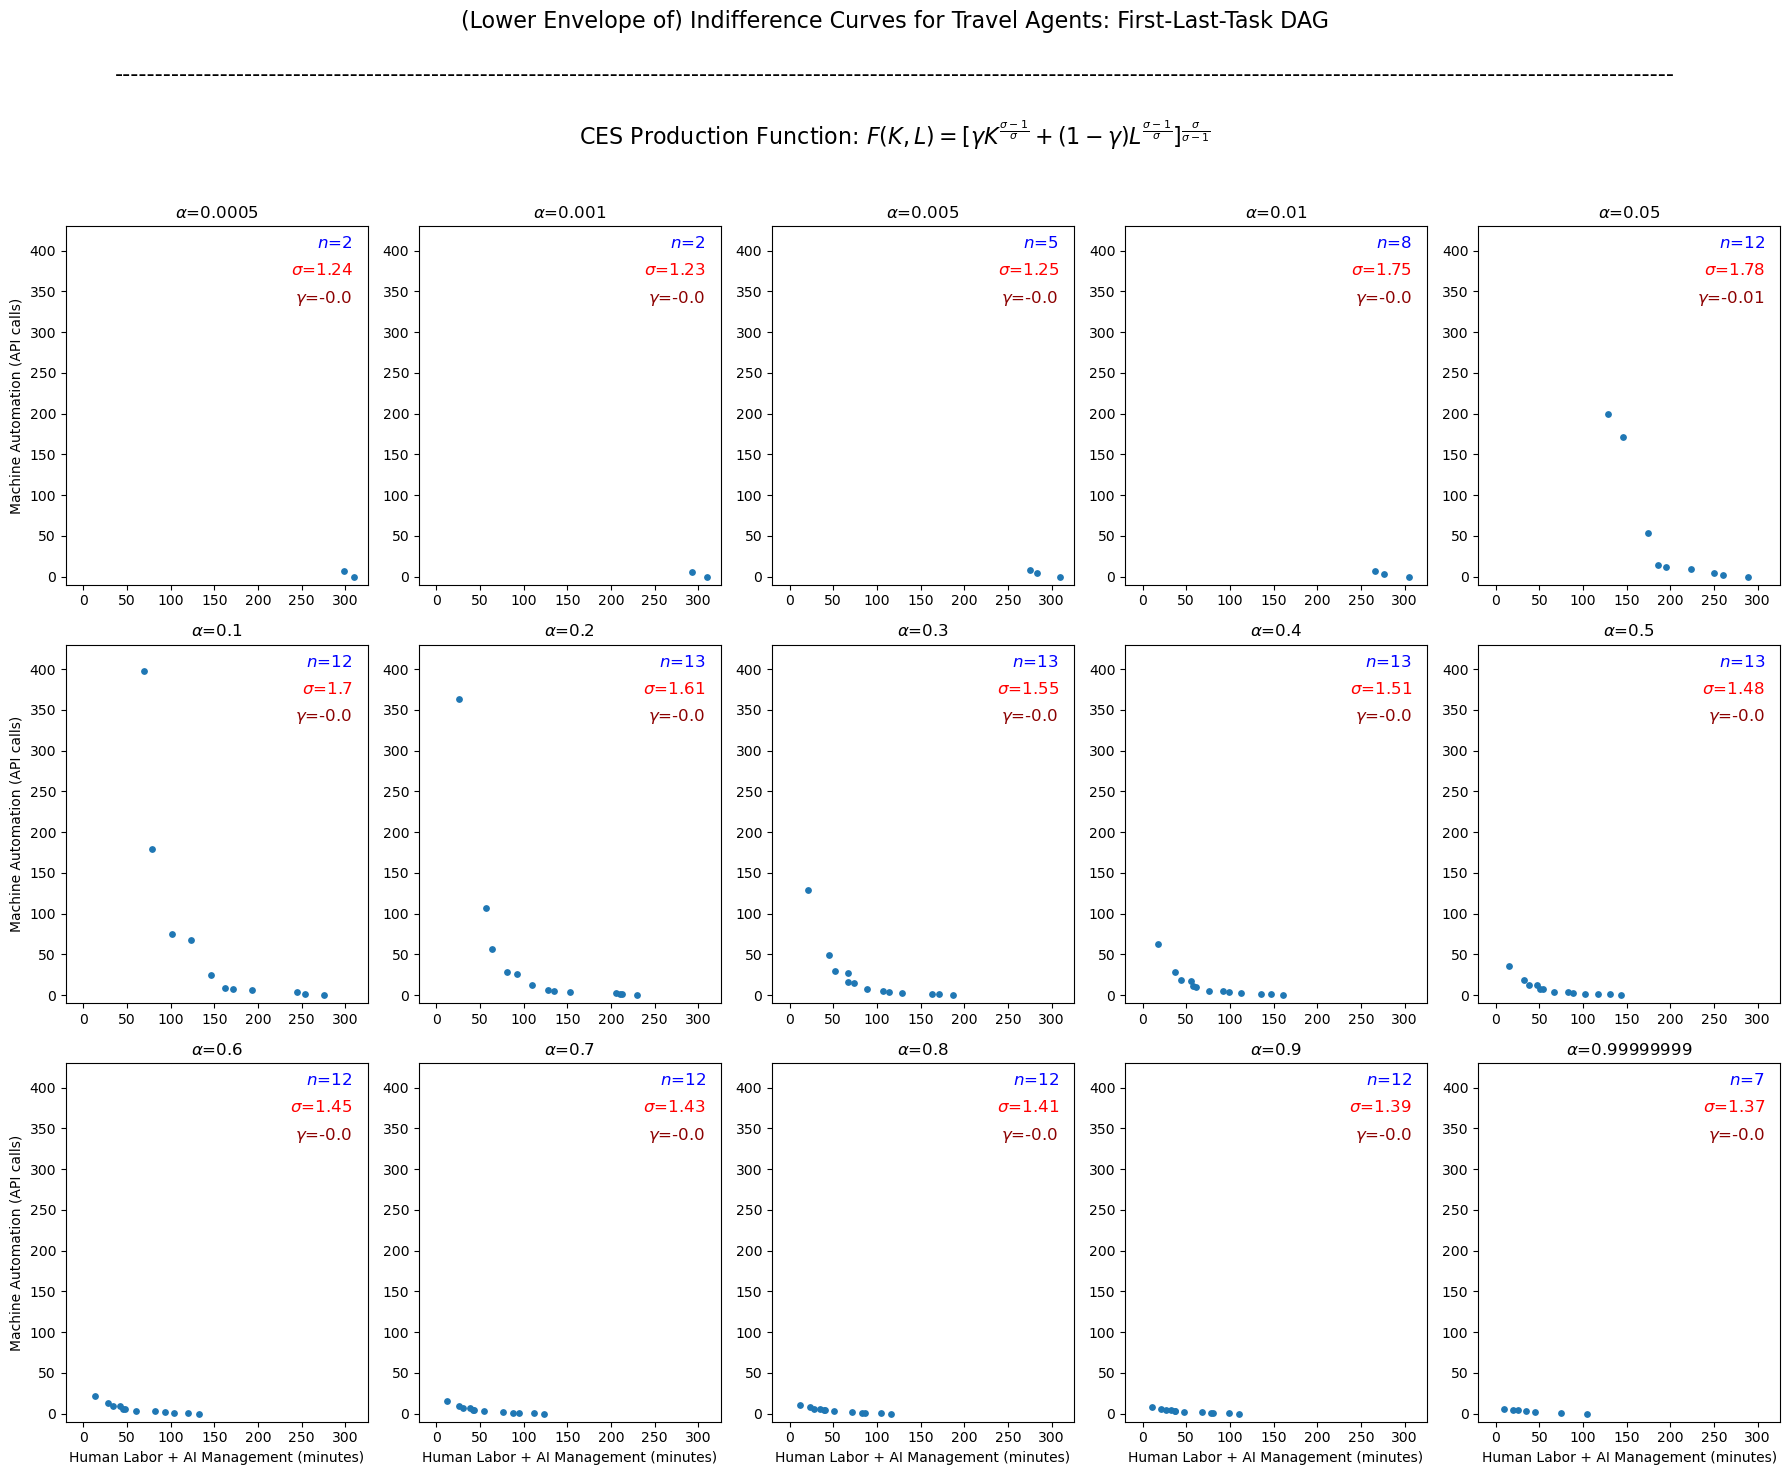

In [602]:
# Create a 2x5 grid of subplots
fig, axs = plt.subplots(3, 5, figsize=(18, 15))

# Iterate over each subplot position and add a plot
for i in range(3): 
    for j in range(5): 
        alpha_index = (i % 5) * 5 + j
        my_alpha = alpha_list[alpha_index] # ignore epsilon

        # Subset corresponding alpha's data from master dataset
        my_alpha_indiff_df = lower_envelope_df[lower_envelope_df['alpha']==my_alpha]
        #print(f'Alpha = {my_alpha} - # of Points: {my_alpha_indiff_df.shape[0]}')
        axs[i, j].scatter(my_alpha_indiff_df.labor_cost, my_alpha_indiff_df.machine_cost, s=15)

        # Get ETS and CES elasticity for current alpha
        my_alpha_sigma = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'sigma'].values[0]
        my_alpha_gamma = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'gamma'].values[0]
        
        my_alpha_sigma = np.round(my_alpha_sigma, 2)
        my_alpha_gamma = np.round(my_alpha_gamma, 2)
        
        axs[i, j].title.set_text(r'$\alpha$' + f'={np.round(my_alpha,1)}')
        axs[i, j].title.set_text(r'$\alpha$' + f'={my_alpha}')
        if i == 2:
              axs[i, j].set_xlabel('Human Labor + AI Management (minutes)')
        if j == 0:
              axs[i, j].set_ylabel('Machine Automation (API calls)')
        #axs[i, j].legend(loc = 'upper right')

        axs[i, j].set_xlim(-20, lower_envelope_df.human_labor_cost.max() * 1.05)
        #axs[i, j].set_ylim(-20, lower_envelope_df.machine_cost.max() * 1.05)
        #axs[i, j].set_xlim(-20, 320)
        axs[i, j].set_ylim(-10, 430)

        # Add ETS to plot
        n_display = r'$n$' + f'={my_alpha_indiff_df.shape[0]}'
        sigma_display = r'$\sigma$' + f'={np.round(my_alpha_sigma, 2)}'
        gamma_display = r'$\gamma$' + f'={np.round(my_alpha_gamma, 2)}'
        axs[i, j].text(0.95, 0.975, n_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='blue')
        axs[i, j].text(0.95, 0.9, sigma_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='red')
        axs[i, j].text(0.95, 0.825, gamma_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='darkred')
        

fig.suptitle(f'(Lower Envelope of) Indifference Curves for {plot_title_occupation}: First-Last-Task DAG\n' +
             '\n' + 
            '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n' + 
             r'CES Production Function: $F(K,L) = [\gamma K^{\frac{\sigma-1}{\sigma}} + (1-\gamma) L^{\frac{\sigma-1}{\sigma}}]^{\frac{\sigma}{\sigma-1}} $' + 
             '\n' +
             #r'Elasticity of (Technical) Substitution: $\sigma$ = $\frac{dln(\frac{K}{L})}{dln(\frac{w}{r})}$' +
             #'\n' +
             #'------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' +
             #f'# of avg Tokens per Prompt required to complete an Automated task = {avg_num_prompts}\n' +
             #f'(Notion for relative cost of Machine Labor and Human Labor)\n' + 
             '\n',
             fontsize=16)

plt.tight_layout()

# Save the plot
plt.savefig(f'{occupation_folder}/indiffCurves/{occupation}_indiffCurves_FLT_totalCost_newProdFuncDef.png', dpi=300)
#plt.savefig(f'{occupation_folder}/indiffCurves/{occupation}_indiffCurves_FLT_totalCost_{avg_num_prompts}.png', dpi=300)
#plt.savefig(f'{data_path}/daily_tasks_occupations_analysis/plots/indiffCurves/{occupation}_indiffCurves_FLT.png', dpi=300)

# Show plot
plt.show()

In [586]:
lower_envelope_df.head(100)

,alpha,execution_plan,human_tasks,managed_tasks,automated_tasks,human_labor_cost,management_cost,machine_cost,labor_cost,total_cost,min_total_cost_flag
0,0.0005,"[[0, 5], [1], [2], [3], [4], [6], [7]]","[1, 2, 3, 4, 6, 7]",[[0]],[[5]],265,33.4370,6.687400e+00,298.4370,298.443687,True
1,0.0005,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 2, 3, 4, 5, 6, 7]",[],[],310,0.0000,1.000000e-08,310.0000,310.000000,False
2,0.0010,"[[0, 5], [1], [2], [3], [4], [6], [7]]","[1, 2, 3, 4, 6, 7]",[[0]],[[5]],265,28.1171,5.623400e+00,293.1171,293.122723,True
3,0.0010,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 2, 3, 4, 5, 6, 7]",[],[],310,0.0000,1.000000e-08,310.0000,310.000000,False
4,0.0050,"[[0, 1, 2, 3, 4, 5, 6, 7]]",[],"[[0, 7]]","[[1, 2, 3, 4, 5, 6]]",0,240.2249,4.423619e+06,240.2249,4663.844150,False
5,0.0050,"[[0, 2, 3, 4, 5, 6, 7], [1]]",[1],"[[0, 7]]","[[2, 3, 4, 5, 6]]",30,240.2249,1.177408e+05,270.2249,387.965704,False
6,0.0050,"[[0, 5], [1], [2], [3], [4], [6, 7]]","[1, 2, 3, 4]","[[0], [7]]","[[5], [6]]",225,50.7427,7.521200e+00,275.7427,275.750221,True
7,0.0050,"[[0, 5], [1], [2], [3], [4], [6], [7]]","[1, 2, 3, 4, 6, 7]",[[0]],[[5]],265,18.8030,3.760600e+00,283.8030,283.806761,False
8,0.0050,"[[0], [1], [2], [3], [4], [5], [6], [7]]","[0, 1, 2, 3, 4, 5, 6, 7]",[],[],310,0.0000,1.000000e-08,310.0000,310.000000,False
9,0.0100,"[[0, 1, 2, 3, 4, 5, 6, 7]]",[],"[[0, 7]]","[[1, 2, 3, 4, 5, 6]]",0,158.4893,7.553552e+05,158.4893,913.844547,False


In [587]:
# indiff_df = indiff_df_orig.copy()

# # min wage = $15 / hour
# labor_wage = 15 / 60 # $ per minute

# # management cost: rental cost of capital
# AI_rental_cost = 1

# # avg number of tokens per prompt
# avg_num_prompts_list = [5000, 1000, 500, 100, 50, 10, 5]
# for avg_num_prompts in avg_num_prompts_list:

#     # GPT-4 cost per 1 million tokens: $30
#     API_cost = avg_num_prompts * 30 / 1e6 # $ per prompt

#     # convert machine labor cost to minutes and add to human labor cost in minutes
#     indiff_df['labor_cost'] = indiff_df.apply(lambda row: row['human_labor_cost'] + (row['machine_labor_cost'] * API_cost / labor_wage), axis=1)

#     # calculate total cost
#     indiff_df['total_cost'] = indiff_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

#     # find optimal execution plan
#     indiff_df['min_total_cost_flag'] = indiff_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())
#     indiff_df[indiff_df.alpha > 0].min_total_cost_flag.value_counts()




#     # Get lower envelope of points
#     lower_envelope_df = pd.DataFrame()
#     for i in range(2): 
#         for j in range(5):
#             alpha_index = (i % 5) * 5 + j
#             my_alpha = alpha_list[alpha_index]

#             # subset corresponding alpha's data from master dataset
#             my_alpha_indiff_df = indiff_df[indiff_df['alpha']==my_alpha]

#             # drop duplicates, if any exist
#             my_alpha_indiff_df = my_alpha_indiff_df.drop_duplicates(subset=['labor_cost', 'management_cost'])

#             # get lower envelope for current alpha
#             my_alpha_indiff_lower_envelope_df = remove_dominated_points(my_alpha_indiff_df)

#             # append to lower envelope dataframe
#             lower_envelope_df = pd.concat([lower_envelope_df, my_alpha_indiff_lower_envelope_df], ignore_index=True)
#     lower_envelope_df
#     lower_envelope_df[lower_envelope_df.alpha > 0].min_total_cost_flag.value_counts()



#     # Get multiple labor-management wage pairs and find optimal plan for each
#     n = 250 # number of different pairs / 2
#     cost_max = 10

#     # for a fixed labor_wage generate n different AI_rental_cost values
#     list_1 = list(np.linspace(1, cost_max, n))
#     list_2 = [1 / value for value in list_1]
#     AI_rental_cost_list = list_1[1:] + list_2

#     AI_rental_cost_list = [value * labor_wage for value in AI_rental_cost_list]

#     # Fix labor_wage and vary AI_rental_cost 
#     optimal_plans_df = pd.DataFrame()
#     for AI_rental_cost in AI_rental_cost_list:
#         ###### hacky way of getting around zero input values ######
#         lower_envelope_df['labor_cost'] = lower_envelope_df['labor_cost'].apply(lambda x: x + epsilon if x == 0 else x)
#         lower_envelope_df['management_cost'] = lower_envelope_df['management_cost'].apply(lambda x: x + epsilon if x == 0 else x)

#         # Calculate total cost
#         lower_envelope_df['total_cost'] = lower_envelope_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

#         # Find optimal execution plan given labor_wage and AI_rental_cost
#         lower_envelope_df['min_total_cost_flag'] = lower_envelope_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())

#         # Save optimal plan to master dataframe
#         aux_df = lower_envelope_df[lower_envelope_df.min_total_cost_flag]
#         aux_df['AI_rental_cost'] = AI_rental_cost
#         optimal_plans_df = pd.concat([optimal_plans_df, aux_df], ignore_index=True)

#     # Sort by alpha and AI_rental_cost
#     optimal_plans_df = optimal_plans_df.sort_values(by=['alpha', 'AI_rental_cost']).reset_index(drop=True)
#     optimal_plans_df.tail(2*n)


#     # Run regression to find elasticity of technical substitution
#     ETS_df = pd.DataFrame()
#     for my_alpha in alpha_list:
#         # Subset data for current alpha
#         my_alpha_regression_df = optimal_plans_df[optimal_plans_df.alpha == my_alpha]

#         # Calculate elasticity of technical substitution
#         ETS = calc_ETS_by_regression(my_alpha_regression_df, labor_wage)

#         # Append to dataframe
#         aux_df = pd.DataFrame({'alpha': [my_alpha], 'ETS': [ETS]})
#         ETS_df = pd.concat([ETS_df, aux_df], ignore_index=True)

#     ETS_df['CES_elasticity'] = (ETS_df['ETS'] - 1) / ETS_df['ETS']




#     # Create a 2x5 grid of subplots
#     fig, axs = plt.subplots(2, 5, figsize=(18, 10))

#     # Iterate over each subplot position and add a plot
#     for i in range(2): 
#         for j in range(5): 
#             alpha_index = (i % 5) * 5 + j
#             my_alpha = alpha_list[alpha_index] # ignore epsilon

#             # Subset corresponding alpha's data from master dataset
#             my_alpha_indiff_df = lower_envelope_df[lower_envelope_df['alpha']==my_alpha]
#             axs[i, j].scatter(my_alpha_indiff_df.labor_cost, my_alpha_indiff_df.management_cost, s=15)

#             # Get ETS and CES elasticity for current alpha
#             my_alpha_ETS = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'ETS'].values[0]
#             my_alpha_CES_elasticity = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'CES_elasticity'].values[0]

#             my_alpha_ETS = np.round(my_alpha_ETS, 2)
#             my_alpha_CES_elasticity = np.round(my_alpha_CES_elasticity, 2)
            
            
#             axs[i, j].title.set_text(r'$\alpha$' + f'={np.round(my_alpha,1)}')
#             if i == 1:
#                 axs[i, j].set_xlabel('Human + Machine Labor (minutes)')
#             if j == 0:
#                 axs[i, j].set_ylabel('AI Management (minutes)')
#             #axs[i, j].legend(loc = 'upper right')

#             axs[i, j].set_xlim(-20, lower_envelope_df.labor_cost.max() * 1.05)
#             axs[i, j].set_ylim(-20, lower_envelope_df.management_cost.max() * 1.05)

#             # Add ETS to plot
#             CES_elasticity_display = r'$\rho$' + f'={np.round(my_alpha_CES_elasticity, 2)}'
#             ETS_display = r'$\sigma$' + f'={np.round(my_alpha_ETS, 2)}'
#             axs[i, j].text(0.95, 0.975, ETS_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='red')
#             #axs[i, j].text(0.95, 0.9, CES_elasticity_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')
            

#     fig.suptitle(f'Indifference Curves and Elasticity of Substitution for {plot_title_occupation}: First-Last-Task DAG\n' +
#                 '\n' + 
#                 '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' + 
#                 r'CES Production Function: $F(K,L) = [\gamma K^{\frac{\sigma-1}{\sigma}} + (1-\gamma) L^{\frac{\sigma-1}{\sigma}}]^{\frac{\sigma}{\sigma-1}} $' + '\n' +
#                 r'Elasticity of (Technical) Substitution: $\sigma$ = $\frac{dln(\frac{K}{L})}{dln(\frac{w}{r})}$' +
#                 '\n' +
#                 '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' +
#                 f'# of avg Tokens needed per Prompt to complete an Automated task = {avg_num_prompts}\n' +
#                 f'(measure for converting Machine Labor units to Human Labor units)\n' + 
#                 '\n',
#                 fontsize=16)

#     plt.tight_layout()

#     # Save the plot
#     plt.savefig(f'{occupation_folder}/indiffCurves/{occupation}_indiffCurves_FLT_totalCost_{avg_num_prompts}.png', dpi=300)
#     #plt.savefig(f'{data_path}/daily_tasks_occupations_analysis/plots/indiffCurves/{occupation}_indiffCurves_FLT.png', dpi=300)

#     # Show plot
#     plt.show()